In [2]:
import torch
import torch.nn as nn

In [4]:
# Linear rate warming up using optims

optimizer = torch.optim.Adam([torch.tensor(0.0)], lr=0.0)

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
one_cicle = torch.optim.lr_scheduler.OneCycleLR(
  optimizer, 
  max_lr = 1e-3, # Upper learning rate boundaries in the cycle for each parameter group
  steps_per_epoch = 400, # The number of steps per epoch to train for.
  epochs = 100, # The number of epochs to train for.
  anneal_strategy = 'linear' # Specifies the annealing strategy
) 

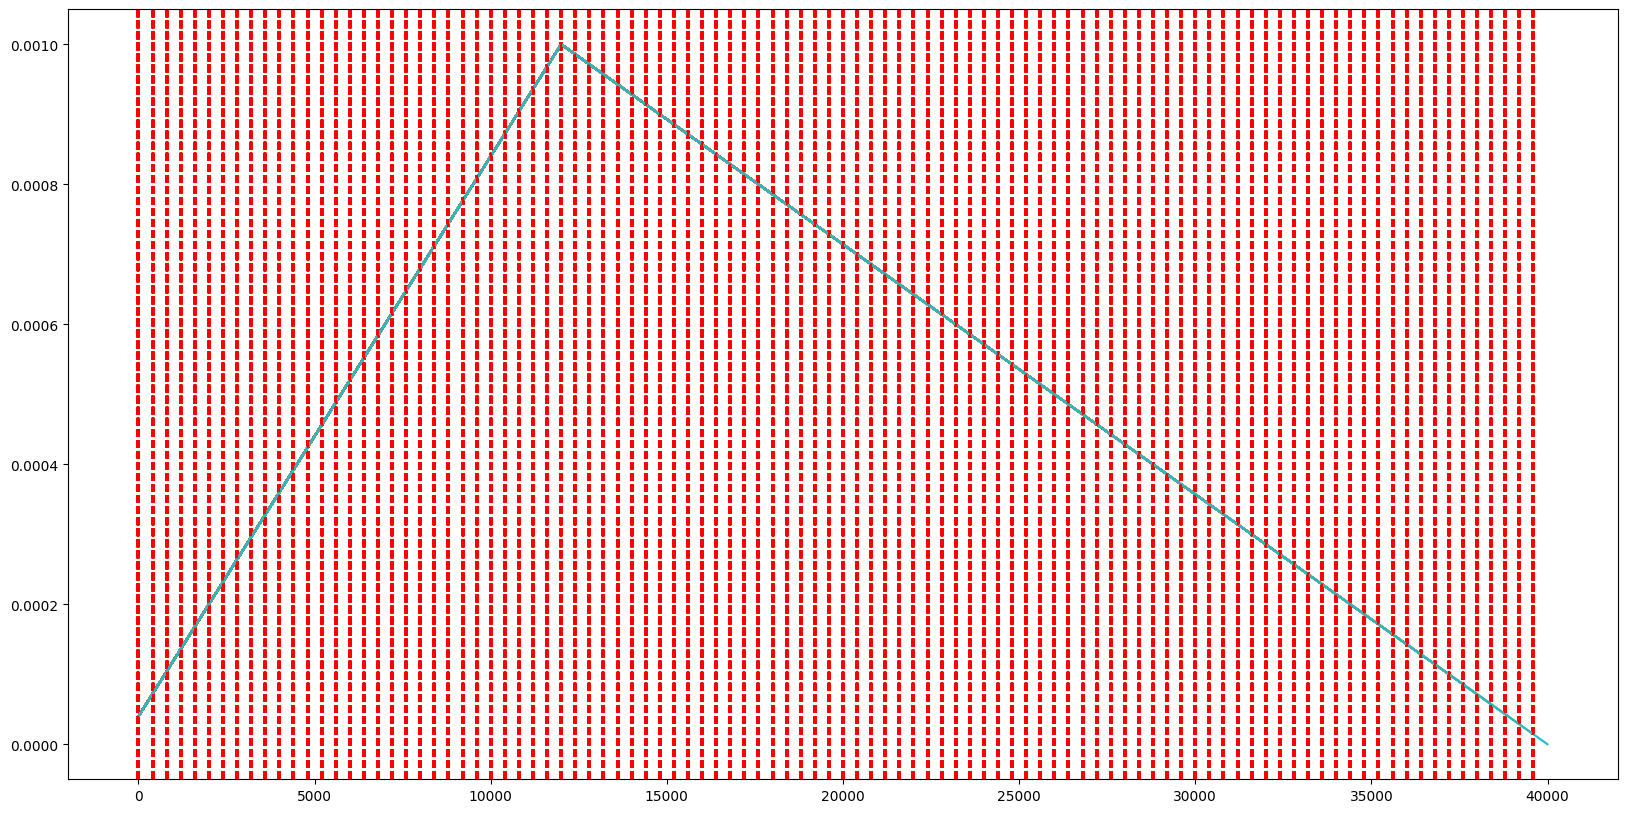

In [52]:
import matplotlib.pyplot as plt

lrs = []
epochs = 100

fig, ax = plt.subplots(figsize=(20, 10))

for i in range(epochs):
  for step in range(400):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    one_cicle.step()

  ax.plot(lrs)
  # Plot a vertical line every 400 steps to represent the end of an epoch
  for i in range(epochs):
    ax.axvline(i * 400, color='red', linestyle='--')

In [55]:
# Sequential LR. First a linear warmup for 10 epochs, then an exponential decay until end of training

optimizer = torch.optim.Adam([torch.tensor(0.0)], lr=1e-4)
sched1 = torch.optim.lr_scheduler.LinearLR(optimizer, last_epoch=10)
sched2 = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
sched = torch.optim.lr_scheduler.SequentialScheduler([sched1, sched2])

lrs = []
epochs = 100
fig, ax = plt.subplots(figsize=(20, 10))

for i in range(epochs):
  for step in range(400):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    sched.step()

  ax.plot(lrs)
  # Plot a vertical line every 400 steps to represent the end of an epoch
  for i in range(epochs):
    ax.axvline(i * 400, color='red', linestyle='--')




TypeError: LinearLR.__init__() got an unexpected keyword argument 'end_lr'

3.49975e-08
5.999499999999999e-08
8.49925e-08
1.0999e-07
1.349875e-07
1.5998499999999999e-07
1.8498249999999997e-07
2.0997999999999998e-07
2.349775e-07
2.5997499999999994e-07
2.849724999999999e-07
3.099699999999999e-07
3.349674999999999e-07
3.599649999999999e-07
3.849624999999999e-07
4.099599999999999e-07
4.3495749999999996e-07
4.599549999999999e-07
4.849525e-07
5.0995e-07
5.349475e-07
5.59945e-07
5.849425e-07
6.0994e-07
6.349375e-07
6.59935e-07
6.849325e-07
7.099300000000001e-07
7.349275000000001e-07
7.599250000000001e-07
7.849225e-07
8.099199999999999e-07
8.349174999999999e-07
8.599149999999998e-07
8.849124999999998e-07
9.099099999999998e-07
9.349074999999997e-07
9.599049999999996e-07
9.849024999999996e-07
1.0098999999999996e-06
1.0348974999999996e-06
1.0598949999999997e-06
1.0848924999999997e-06
1.1098899999999997e-06
1.1348874999999997e-06
1.1598849999999997e-06
1.1848824999999997e-06
1.2098799999999997e-06
1.2348774999999997e-06
1.2598749999999997e-06
1.2848724999999997e-06
1.3098

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


3.5311227577322437e-06
3.5289233662029276e-06
3.5267280792929916e-06
3.524536884251207e-06
3.5223497683817343e-06
3.5201667190438143e-06
3.5179877236514595e-06
3.5158127696731497e-06
3.513641844631533e-06
3.511474936103118e-06
3.5093120317179825e-06
3.5071531191594725e-06
3.5049981861639084e-06
3.5028472205202937e-06
3.5007002100700246e-06
3.4985571427065983e-06
3.4964180063753288e-06
3.494282789073061e-06
3.492151478847891e-06
3.49002406379888e-06
3.4879005320757793e-06
3.485780871878749e-06
3.4836650714580888e-06
3.481553119113957e-06
3.479445003196105e-06
3.477340712103605e-06
3.4752402342845796e-06
3.47314355823594e-06
3.4710506725031163e-06
3.4689615656798015e-06
3.466876226407682e-06
3.4647946433761855e-06
3.4627168053222183e-06
3.460642701029914e-06
3.4585723193303736e-06
3.4565056491014177e-06
3.454442679267334e-06
3.4523833987986266e-06
3.4503277967117714e-06
3.448275862068966e-06
3.446227583977888e-06
3.4441829515914535e-06
3.4421419541075715e-06
3.4401045807689077e-06
3.4380

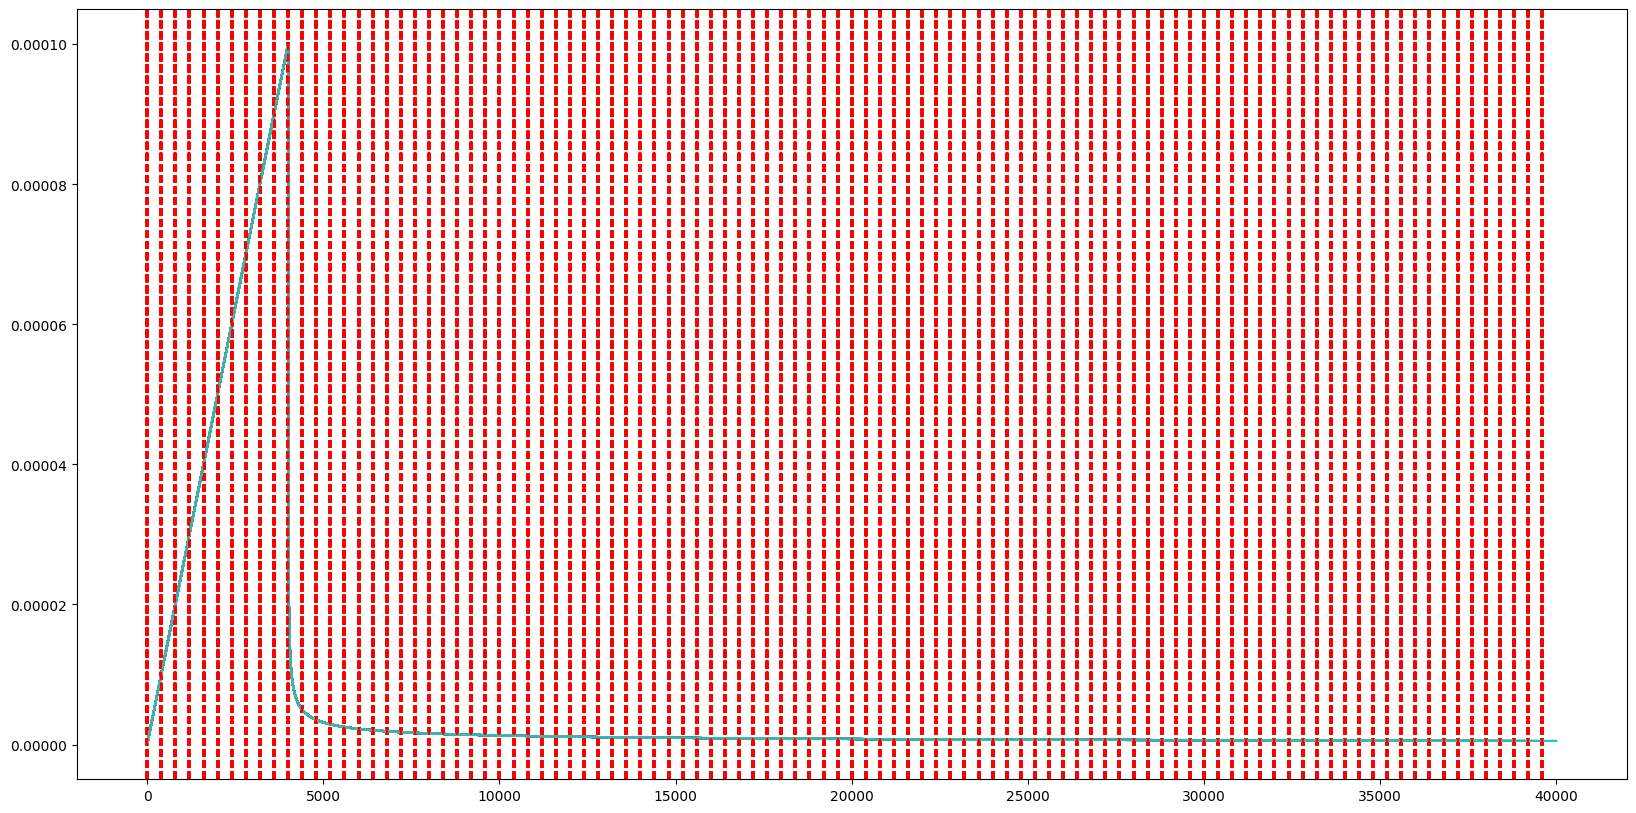

In [119]:
import numpy as np
import matplotlib.pyplot as plt
optimizer = torch.optim.Adam([torch.tensor(0.0)], lr=1e-4)

sched1 = torch.optim.lr_scheduler.LinearLR(
  optimizer,
  start_factor=0.0001,
  total_iters=4000
)

sched2 = torch.optim.lr_scheduler.LambdaLR( # inverse square root decay
  optimizer,
  last_epoch=-1,
  lr_lambda=lambda step: 1 / np.sqrt(step + 1) 
)


  
sched = torch.optim.lr_scheduler.SequentialLR(
  optimizer=optimizer,
  milestones=[4000], 
  schedulers=[sched1, sched2],
)


lrs = []
epochs = 100
fig, ax = plt.subplots(figsize=(20, 10))

for i in range(epochs):
  for step in range(400):
    optimizer.step()
    sched.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    print(optimizer.param_groups[0]['lr'])

  ax.plot(lrs)
  # Plot a vertical line every 400 steps to represent the end of an epoch
  for i in range(epochs):
    ax.axvline(i * 400, color='red', linestyle='--')



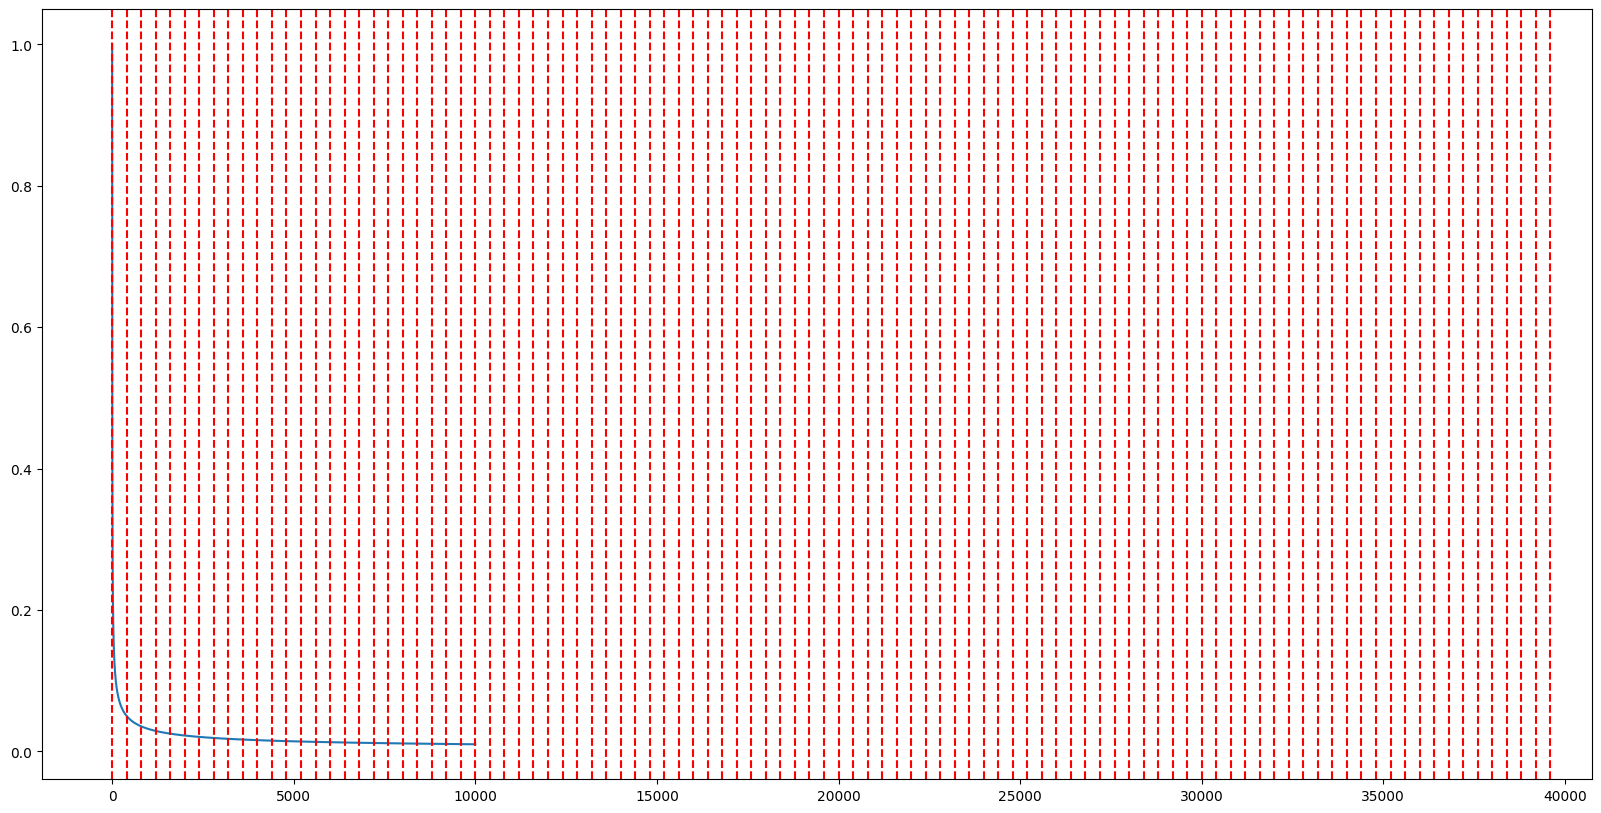

In [67]:
optimizer = torch.optim.Adam([torch.tensor(0.0)], lr=1e-4)

sched = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  last_epoch=-1,
  lr_lambda=lambda epoch: 1 / np.sqrt(epoch + 1)
)



lrs = []
epochs = 100
fig, ax = plt.subplots(figsize=(20, 10))

for i in range(epochs):
  for step in range(400):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    sched.step()

ax.plot(lrs)
  # Plot a vertical line every 400 steps to represent the end of an epoch
for i in range(epochs):
  ax.axvline(i * 400, color='red', linestyle='--')



[   0    1    2 ... 3997 3998 3999] [       inf 0.00632376 0.00447158 ... 0.00010003 0.00010001 0.0001    ]


/tmp/ipykernel_178860/2855992981.py:3: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(np.arange(4000), 1e-4 * (1 / np.linspace(0, 1, 4000) ** 0.5))
/tmp/ipykernel_178860/2855992981.py:5: RuntimeWarning: divide by zero encountered in true_divide
  print(np.arange(4000), 1e-4 * (1 / np.linspace(0, 1, 4000) ** 0.5))


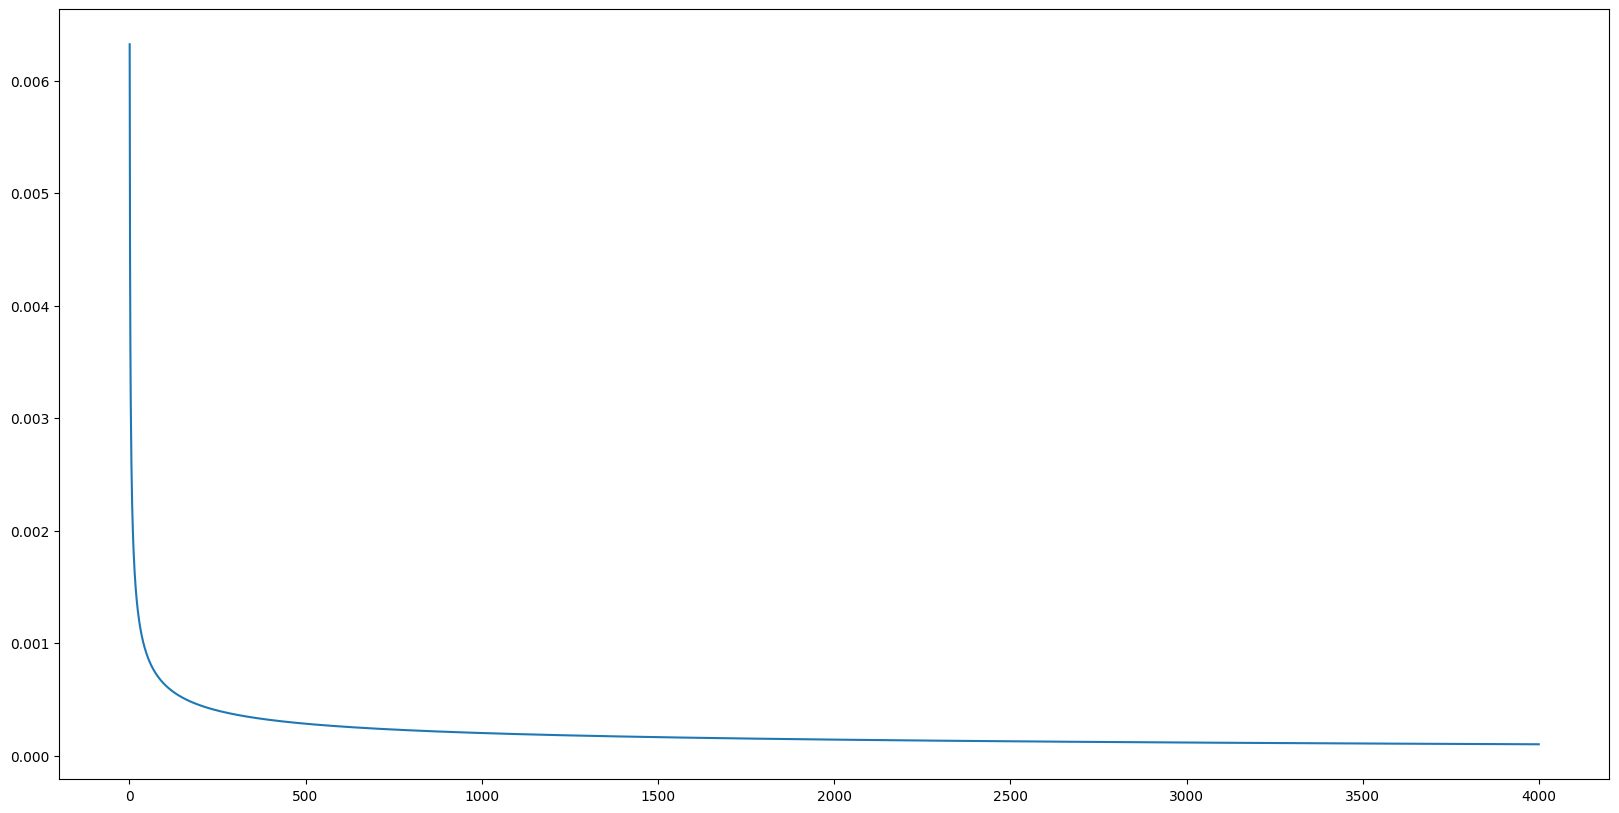

In [76]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(np.arange(4000), 1e-4 * (1 / np.linspace(0, 1, 4000) ** 0.5))

print(np.arange(4000), 1e-4 * (1 / np.linspace(0, 1, 4000) ** 0.5))